In [20]:
from pathlib import Path
import numpy as np 
import pandas as pd 

ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]
DATA_RAW = ROOT / "data" / "raw"
ASSETS = ROOT / "app" / "assets" / "eda"
ASSETS.mkdir(parents = True, exist_ok=True)

print("ROOT", ROOT)
print("DATA_RAW", DATA_RAW)
print("ASSETS", ASSETS)

ROOT c:\Users\hines\medical-report-assistance
DATA_RAW c:\Users\hines\medical-report-assistance\data\raw
ASSETS c:\Users\hines\medical-report-assistance\app\assets\eda


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
df = pd.read_csv("../data/raw/clinical_notes.csv")
df.head()

,patient_id,note_text
0,0,Patient is a 32-year-old Male with a history o...
1,1,Patient is a 65-year-old Female with a history...
2,2,Patient is a 20-year-old Female with a history...
3,3,Patient is a 39-year-old Female with a history...
4,4,Patient is a 69-year-old Male with a history o...


In [6]:
print("Number of notes", df.shape)
print("Missing value: ", df.isnull().sum())

Number of notes (201, 2)
Missing value:  patient_id    0
note_text     0
dtype: int64


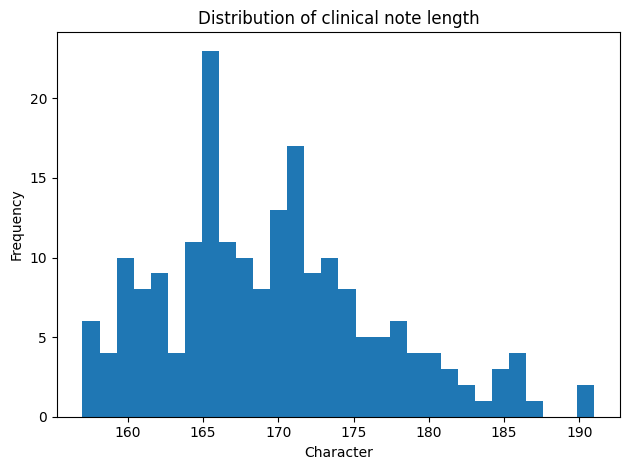

In [7]:
df['note_length'] = df['note_text'].apply(len)

plt.hist(df['note_length'], bins=30)
plt.title("Distribution of clinical note length")
plt.xlabel("Character")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

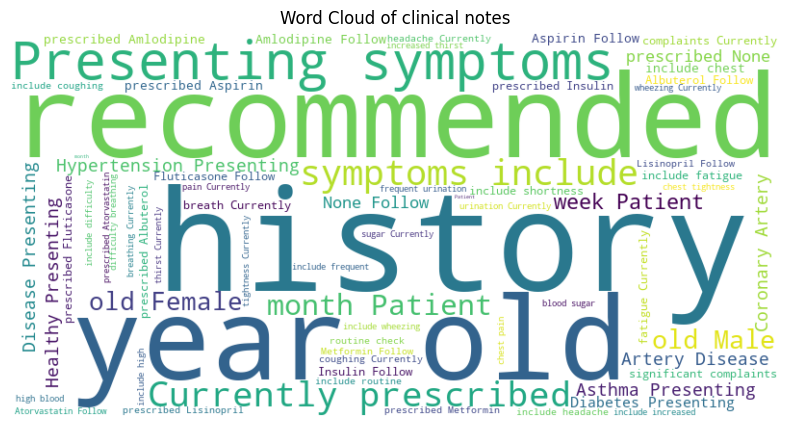

In [8]:
#word cloud (all notes combined)
text = " ".join(df['note_text'].tolist())
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of clinical notes")
plt.show()

In [9]:
for keyword in ["Diabetes", "Hypertension", "Asthma", "Coronary Artery Disease", "Healthy"]:
    count = df['note_text'].str.contains(keyword).sum()
    print(f"{keyword}:{count} notes mentioning it")

Diabetes:37 notes mentioning it
Hypertension:43 notes mentioning it
Asthma:42 notes mentioning it
Coronary Artery Disease:40 notes mentioning it
Healthy:39 notes mentioning it


In [10]:
import re

# Extract diagnosis
df['diagnosis'] = df['note_text'].str.extract(r"history of ([^.]+)\.")

# Quick check
print(df[['note_text', 'diagnosis']].head())

                                           note_text     diagnosis
0  Patient is a 32-year-old Male with a history o...       Healthy
1  Patient is a 65-year-old Female with a history...  Hypertension
2  Patient is a 20-year-old Female with a history...      Diabetes
3  Patient is a 39-year-old Female with a history...        Asthma
4  Patient is a 69-year-old Male with a history o...  Hypertension


In [12]:
# Extract symptom (everything after 'symptoms include')
df['symptom'] = df['note_text'].str.extract(r"symptoms include ([^.]+)\.")

# Quick check
print(df[['note_text', 'symptom']].head())


                                           note_text             symptom
0  Patient is a 32-year-old Male with a history o...    routine check-up
1  Patient is a 65-year-old Female with a history...          chest pain
2  Patient is a 20-year-old Female with a history...  frequent urination
3  Patient is a 39-year-old Female with a history...            wheezing
4  Patient is a 69-year-old Male with a history o...          chest pain


C:\Users\hines\AppData\Local\Temp\ipykernel_5368\2626240913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Symptom', data=symptom_counts.head(10), palette="viridis")


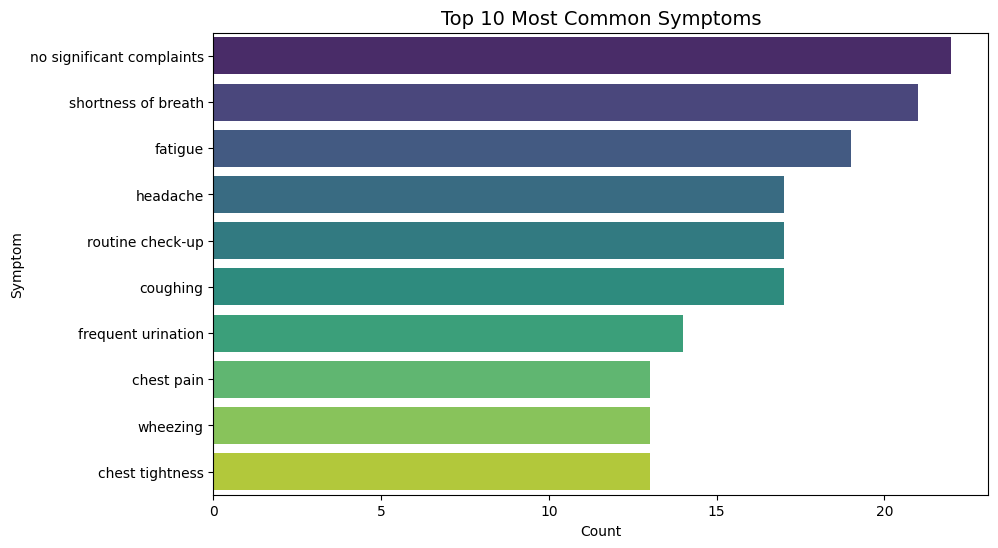

C:\Users\hines\AppData\Local\Temp\ipykernel_5368\2626240913.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Diagnosis', data=diagnosis_counts.head(10), palette="mako")


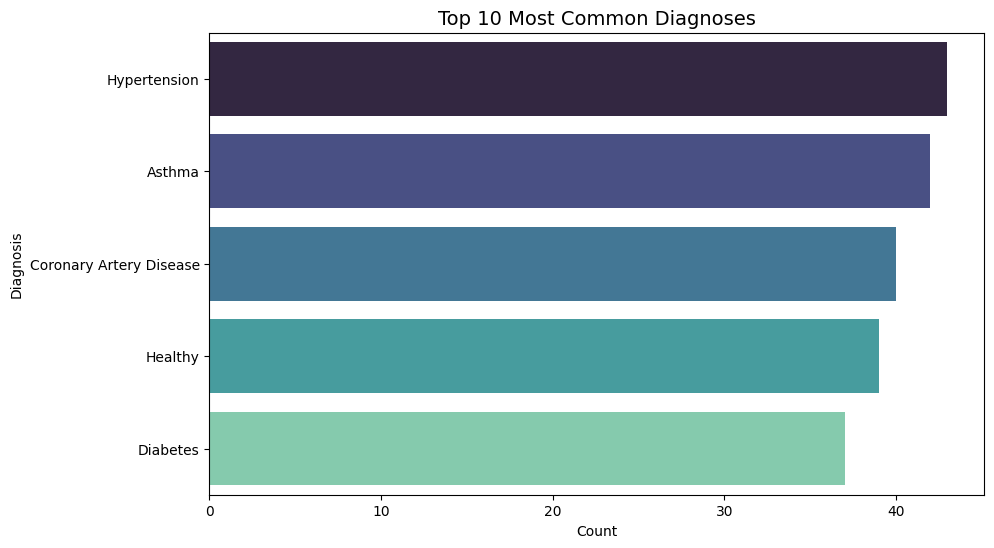

In [15]:
# Symptom frequency
symptom_counts = df['symptom'].value_counts().reset_index()
symptom_counts.columns = ['Symptom', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Symptom', data=symptom_counts.head(10), palette="viridis")
plt.title("Top 10 Most Common Symptoms", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Symptom")
plt.show()

# Diagnosis frequency
diagnosis_counts = df['diagnosis'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Diagnosis', data=diagnosis_counts.head(10), palette="mako")
plt.title("Top 10 Most Common Diagnoses", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Diagnosis")
plt.show()


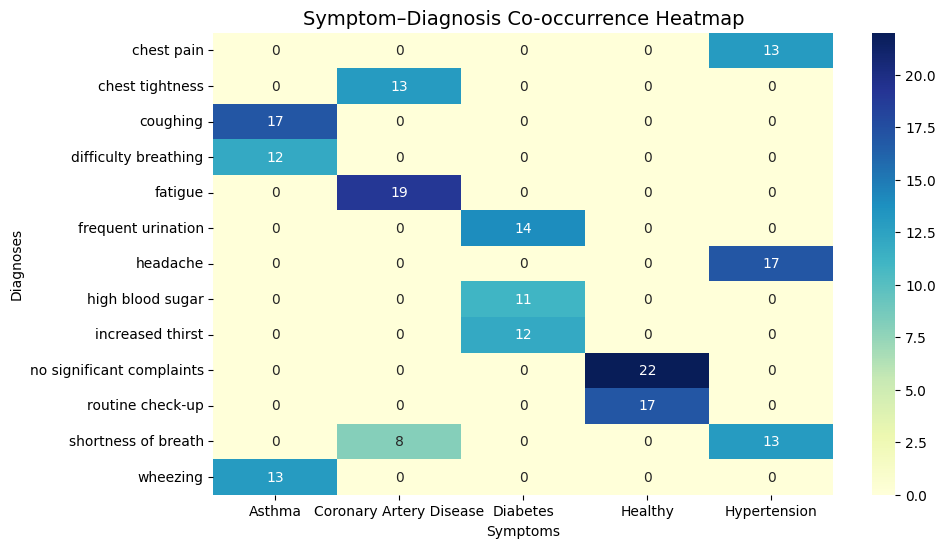

In [21]:
coocurrence = pd.crosstab(df.symptom,df.diagnosis)
# print(coocurrence)

plt.figure(figsize=(10,6))
sns.heatmap(coocurrence,annot=True,fmt='d',cmap='YlGnBu')
plt.title("Symptom–Diagnosis Co-occurrence Heatmap", fontsize=14)
plt.xlabel("Symptoms")
plt.ylabel("Diagnoses")
plt.savefig(ASSETS / 'symptom_diagnosis_heatmap.png',dpi=150)
plt.show()